# Workshop 3 b) NetCDF4

In climate science we often find ourselves with __gridded (array) data__, often in up to 4 dimensions: (latitude, longitude, height/depth/pressure, time). This can be model output, but also observed data. These datasets can be huge, for example, the monthly output of the high resolution Community Earth System Model is some 50 GB and that is for the ocean only!

Apart from the data, e.g. temperatures, we also need to keep track of their locations and record other kinds of metadata. netCDF can store all of this information in a single, standardized file.

Below we quote from the [NetCDF website](https://www.unidata.ucar.edu/software/netcdf/docs/faq.html#whatisit):

>NetCDF (network Common Data Form) is a set of interfaces for array-oriented data access and a freely distributed collection of data access libraries for C, Fortran, C++, Java, and other languages. The netCDF libraries support a machine-independent format for representing scientific data. Together, the interfaces, libraries, and format support the creation, access, and sharing of scientific data.
>
>NetCDF data is:
>
> - Self-Describing. A netCDF file includes information about the data it contains.
> - Portable. A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
> - Scalable. A small subset of a large dataset may be accessed efficiently.
> - Appendable. Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
> - Sharable. One writer and multiple readers may simultaneously access the same netCDF file.
> - Archivable. Access to all earlier forms of netCDF data will be supported by current and future versions of the software.

The second part of this third tutorial will focus on working with the package `netCDF4`. This is based on the [NetCDF4 documentation](https://unidata.github.io/netcdf4-python/). You can use this package to __read and write NetCDF files__, but has no built in computations such as Pandas had. Here, we will focus on reading them only, which you will use most often.

`import netCDF4 as nc`

You can check wether netCDF4 is alreay installed on your pc with the command

`conda list`

This gives an overview of all the packages that are installed. If you don't have pandas yet, install it with

`conda install netCDF4` or `pip install netCDF4` 

You can do this directly in the Notebook or in the terminal.

In [3]:
import numpy as np
import netCDF4 as nc
from matplotlib import pyplot as plt
%matplotlib inline

As an example, we will use modelled wind from the KNMI, retrieved from: https://dataplatform.knmi.nl/dataset/dowa-netcdf-ts-singlepoint-upd-1 . Specifically, this is part of the Dutch Offshore Wind Atlas (DOWA), which contains output from the weather model HARMONIE-AROME, which is nested in re-analyses ERA5. The NetCDF contains the output at one single location for the year 2018.

In [6]:
winddata = nc.Dataset('data/DOWA_40h12tg2_fERA5_NETHERLANDS.NL_ix001_iy001_2018010100-2019010100_v1.0.nc')

Data in a NetCDF file is organised in `variables`. With these variables, a description of what is in the file is provided, such as the dimensions of the arrays and the units. These descriptions are called `attributes`. You can investigate the variables in a file use `file.variables`.

In [16]:
winddata.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     _CoordinateAxisType: Time
     calendar: standard
     long_name: Time
     standard_name: time
     units: days since 2008-01-01 00:00:00
 unlimited dimensions: time
 current shape = (8761,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'y': <class 'netCDF4._netCDF4.Variable'>
 float32 y(y)
     axis: Y
     standard_name: projection_y_coordinate
     long_name: Y Coordinate Of Projection
     units: m
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'x': <class 'netCDF4._netCDF4.Variable'>
 float32 x(x)
     axis: X
     standard_name: projection_x_coordinate
     long_name: X Coordinate Of Projection
     units: m
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(y, x)
     standard_name: longitude
     long_name: Longitud

In order to do computations with the data in this file, we want to extract the variables. We do this with the following code `winddata.variables['lon'][:]`. The `[:]` is necessary to go from a variable structure to an array and the `:` means that we want all the entries in this array.

In [25]:
longitude = winddata.variables['lon'][:]
latitude = winddata.variables['lat'][:]
time = winddata.variables['time'][:]

# Exercises

1. At what heights is the wind measured?

2. Plot the wind speed at 100 m as a function time. Add the units of time in the axis labels. Hint: you may need to use the command `np.squeeze`.

3. Create a scatter plot of the wind direction at 150 m height as a function of time.

4. Print the time-averaged temperature at each height.

5. Create a contourplot of the pressure as a function of time and height.

# Solutions

In [48]:
# 1. At what heights is the wind measured?
height = winddata.variables['height'][:]
print('The wind is measured at')
print(height)
print(winddata.variables['height'].units)
print('where positive is directed ' + winddata.variables['height'].positive)


The wind is measured at
[ 10.  20.  40.  60.  80. 100. 120. 140. 150. 160. 180. 200. 220. 250.
 300. 500. 600.]
m
where positive is directed up


Text(0,0.5,'wind speed [m s-1]')

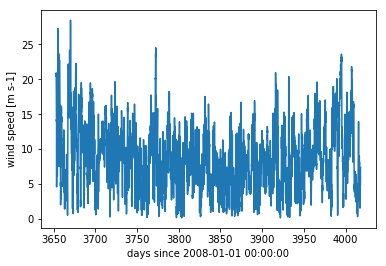

In [99]:
# 2. Plot the wind speed at 100 m as a function time. Add the units of time in the axis labels. 
# Hint: you may need to use the command np.squeeze
wspeed = np.squeeze(winddata.variables['wspeed'][:]) 
idz100 = height==100.

plt.plot(time,wspeed[:,idz100])
plt.xlabel(winddata.variables['time'].units)
plt.ylabel('wind speed ['+ winddata.variables['wspeed'].units+']')

Text(0,0.5,'wind direction [degree]')

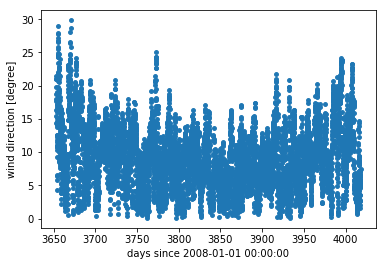

In [102]:
# 3. Create a scatter plot of the wind direction at 150 m height as a function of time.
wdir = np.squeeze(winddata.variables['wdir'][:]) 
idz150 = height==150.

plt.scatter(time,wspeed[:,idz150],15)
plt.xlabel(winddata.variables['time'].units)
plt.ylabel('wind direction ['+ winddata.variables['wdir'].units+']')


In [70]:
# 4. Print the time-averaged temperature at each height.
temp = np.squeeze(winddata.variables['ta'][:]) 
avg_temp_z = np.mean(temp,axis=1)

for ii in range(len(height)):
    print('At %.2f m, the average temperature is %.2f' %(height[ii],avg_temp_z[ii]))

At 10.00 m, the average temperature is 279.40
At 20.00 m, the average temperature is 281.00
At 40.00 m, the average temperature is 281.26
At 60.00 m, the average temperature is 281.27
At 80.00 m, the average temperature is 281.37
At 100.00 m, the average temperature is 281.50
At 120.00 m, the average temperature is 279.89
At 140.00 m, the average temperature is 280.26
At 150.00 m, the average temperature is 280.25
At 160.00 m, the average temperature is 279.79
At 180.00 m, the average temperature is 279.25
At 200.00 m, the average temperature is 278.52
At 220.00 m, the average temperature is 278.45
At 250.00 m, the average temperature is 278.71
At 300.00 m, the average temperature is 278.72
At 500.00 m, the average temperature is 278.56
At 600.00 m, the average temperature is 279.06


Text(0,0.5,'z [m]')

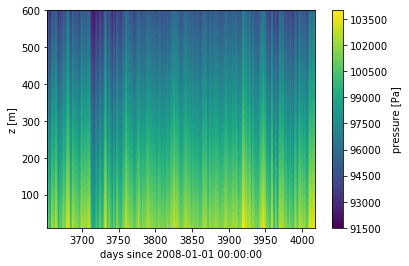

In [105]:
# 5. Create a contourplot of the pressure as a function of time and height.
press = np.squeeze(winddata.variables['p'][:]) 
[Tt,Zz] = np.meshgrid(height,time)

plt.contourf(Zz,Tt,press,50)
plt.colorbar(label='pressure ['+ winddata.variables['p'].units+']')
plt.xlabel(winddata.variables['time'].units)
plt.ylabel('z ['+ winddata.variables['height'].units+']')